In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("titanic_toy.csv")

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [9]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [12]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [13]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

In [14]:
mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [17]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

In [18]:
X_train['Fare_median'] = X_train['Fare'].fillna(median_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)

In [20]:
X_train.sample(6)

,Age,Fare,Family,Fare_median,Fare_mean,Age_median,Age_mean
650,NaN,7.8958,0,7.8958,7.8958,28.75,29.785904
759,33.0,86.5000,0,86.5000,86.5000,33.00,33.000000
696,44.0,8.0500,0,8.0500,8.0500,44.00,44.000000
312,26.0,26.0000,2,26.0000,26.0000,26.00,26.000000
622,20.0,15.7417,2,15.7417,15.7417,20.00,20.000000
440,45.0,26.2500,2,26.2500,26.2500,45.00,45.000000


In [22]:
print("Orginal Age Variable Variance: ", X_train['Age'].var())
print("Age Variance after median imputation: ", X_train['Age_median'].var())
print("Age variance after mean imputation:", X_train['Age_mean'].var())

print("Orginal Fare variabe variance: ", X_train['Fare'].var())
print("Fare Variance after median imputation: ", X_train['Fare_median'].var())
print("Fare Variance after mean imputation: ", X_train['Fare_mean'].var())

Orginal Age Variable Variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age variance after mean imputation: 161.81262452718676
Orginal Fare variabe variance:  2448.1979137063163
Fare Variance after median imputation:  2324.957613614932
Fare Variance after mean imputation:  2324.623996772902


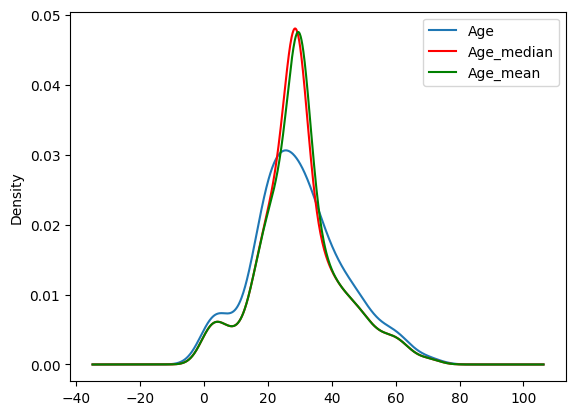

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original variable distribution
X_train['Age'].plot(kind='kde', ax = ax)

# Variable imputed with the median
X_train['Age_median'].plot(kind = 'kde', ax = ax, color='red')

# Variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color = "green")

#Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

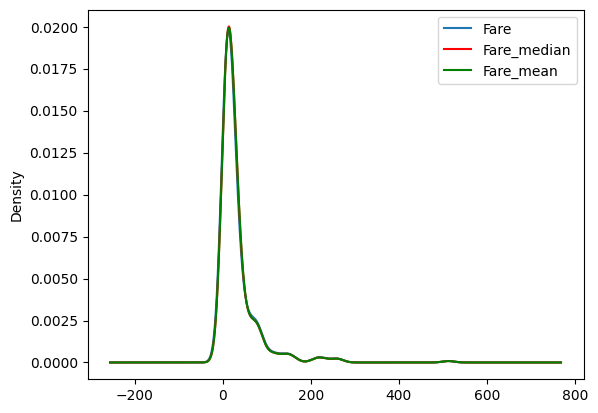

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original variable distribution
X_train['Fare'].plot(kind='kde', ax = ax)

# Variable imputed with the median
X_train['Fare_median'].plot(kind = 'kde', ax = ax, color='red')

# Variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color = "green")

#Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [25]:
X_train.cov()

,Age,Fare,Family,Fare_median,Fare_mean,Age_median,Age_mean
Age,204.349513,70.719262,-6.498901,66.280487,66.383530,204.349513,204.349513
Fare,70.719262,2448.197914,17.258917,2448.197914,2448.197914,57.957599,55.603719
Family,-6.498901,17.258917,2.735252,16.404484,16.399278,-5.112563,-5.146106
Fare_median,66.280487,2448.197914,16.404484,2324.957614,2324.765012,54.710043,52.483705
Fare_mean,66.383530,2448.197914,16.399278,2324.765012,2324.623997,54.793876,52.565299
Age_median,204.349513,57.957599,-5.112563,54.710043,54.793876,161.989566,161.812625
Age_mean,204.349513,55.603719,-5.146106,52.483705,52.565299,161.812625,161.812625


In [28]:
X_train.corr()

,Age,Fare,Family,Fare_median,Fare_mean,Age_median,Age_mean
Age,1.000000,0.092644,-0.299113,0.089604,0.089754,1.000000,1.000000
Fare,0.092644,1.000000,0.208268,1.000000,1.000000,0.091757,0.088069
Family,-0.299113,0.208268,1.000000,0.205710,0.205660,-0.242883,-0.244610
Fare_median,0.089604,1.000000,0.205710,1.000000,0.999989,0.089149,0.085568
Fare_mean,0.089754,1.000000,0.205660,0.999989,1.000000,0.089292,0.085707
Age_median,1.000000,0.091757,-0.242883,0.089149,0.089292,1.000000,0.999454
Age_mean,1.000000,0.088069,-0.244610,0.085568,0.085707,0.999454,1.000000


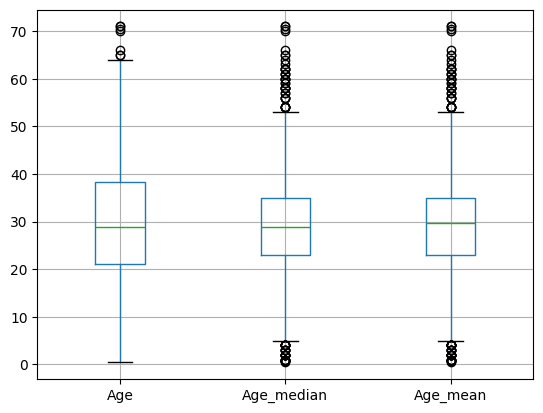

In [29]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()
plt.show()

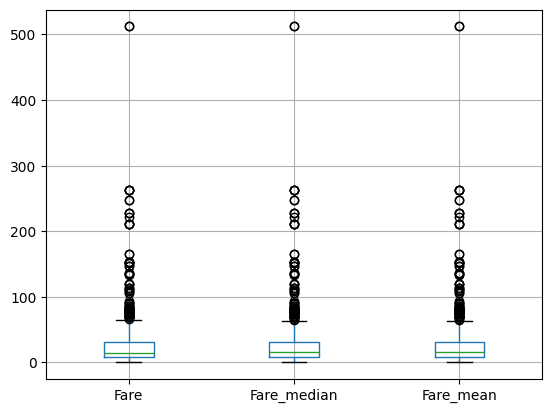

In [30]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()
plt.show()

# Using Sklearn

In [31]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [34]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
], remainder = 'passthrough')

In [35]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [40]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [42]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [43]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))

In [44]:
X_test

array([[ 42.        ,  26.2875    ,   0.        ],
       [ 21.        ,   8.05      ,   0.        ],
       [ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       [ 30.        ,   7.8958    ,   0.        ],
       [ 80.        ,  30.        ,   0.        ],
       [ 25.        ,   7.25      ,   0.        ],
       [ 50.        , 133.65      ,   2.        ],
       [ 25.        ,  26.        ,   1.        ],
       [ 35.        ,  26.        ,   0.        ],
       [ 35.        ,  90.        ,   1.        ],
       [ 55.        ,  16.        ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 19.        ,   7.8542    ,   1.        ],
       [ 28.75      ,  15.2458    ,   2.        ],
       [ 49.        ,   0.        ,   0.        ],
       [ 18.        ,  32.61759689,   1.        ],
       [ 65.        ,   7.75   